In [60]:
#import the libraries needed here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [61]:
### View and Clean Data

In [62]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Training Set Shape ", train.shape)
print("Testing Set Shape ", test.shape)

# Get the top 10 rows of the training set
train.head(10)

Training Set Shape  (1460, 81)
Testing Set Shape  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [64]:
# Remove null values
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
data2 = test.select_dtypes(include=[np.number]).interpolate().dropna()

# Confirm that there are no more null values left
print("Number of null values in training set: ", sum(data.isnull().sum() != 0 ))
print("Number of null values in testing set: ", sum(data2.isnull().sum() != 0 ))

Number of null values in training set:  0
Number of null values in testing set:  0


In [65]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

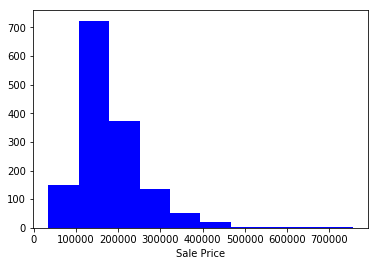

Skew 1.8828757597682129


In [66]:
plt.hist(train.SalePrice, color='blue')
plt.xlabel('Sale Price')
plt.show()

print('Skew', train.SalePrice.skew())

In [69]:
#
numeric_features = data.select_dtypes(include=[np.number])

correlation = numeric_features.corr()

print(correlation['SalePrice'].sort_values(ascending=False)[:3])
print('\n',correlation['SalePrice'].sort_values(ascending=False)[-3:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
Name: SalePrice, dtype: float64

 MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [70]:
# Let's take a look at the positively correlated values
print(correlation['SalePrice'].sort_values(ascending=False)[:10])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [71]:
# Non-Numeric categorical features
categorical_features = train.select_dtypes(exclude=[np.number])
categorical_features.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [72]:
# Features with a greater count of unique values will tend to possess at least 
# one category associated to a specific price range.
categorical_features.nunique().sort_values(ascending=False)[:3]

Neighborhood    25
Exterior2nd     16
Exterior1st     15
dtype: int64

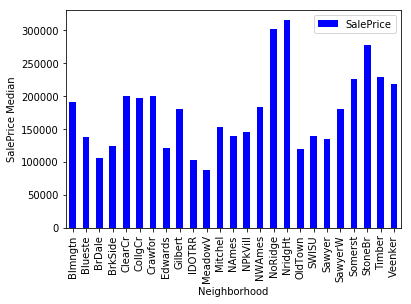

In [73]:
# Neighborhood seems to be an obvious feature that almost everyone considers when buying a home.
neighborhood_pivot = train.pivot_table(index='Neighborhood', values='SalePrice', aggfunc = np.median)
neighborhood_pivot.plot(kind='bar', color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice Median')
plt.show()

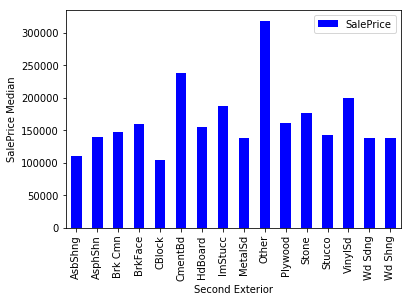

In [74]:
# I'm really curious to know what would be considered as 'other' in regards to materials used on the ext of houses.
exterior2nd_pivot = train.pivot_table(index='Exterior2nd', values='SalePrice', aggfunc = np.median)
exterior2nd_pivot.plot(kind='bar', color='blue')
plt.xlabel('Second Exterior')
plt.ylabel('SalePrice Median')
plt.show()

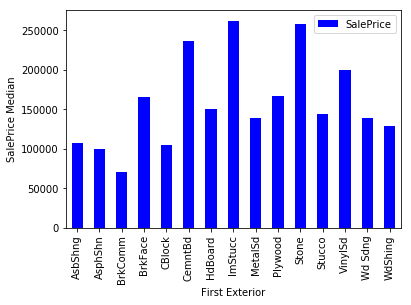

In [75]:
# No surprise here. Stucco tends to the most tedious and expensive to work with.
exterior1st_pivot = train.pivot_table(index='Exterior1st', values='SalePrice', aggfunc = np.median)
exterior1st_pivot.plot(kind='bar', color='blue')
plt.xlabel('First Exterior')
plt.ylabel('SalePrice Median')
plt.show()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


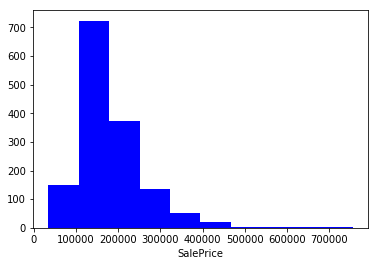

Skew:  1.8828757597682129


In [76]:
# Sale price review
print(train.SalePrice.describe())

plt.hist(train.SalePrice, color='blue')
plt.xlabel('SalePrice')
plt.show()

print('Skew: ',train.SalePrice.skew())

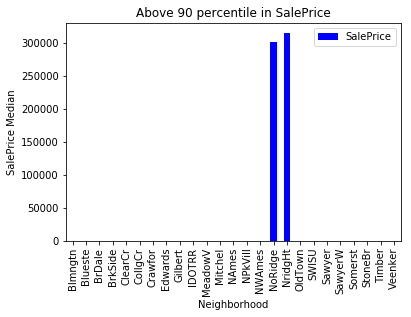

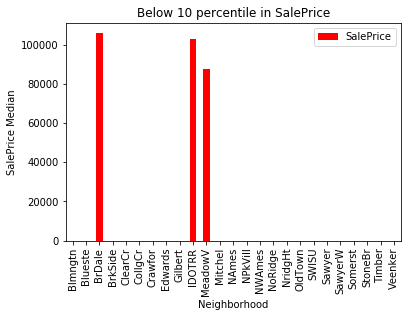

In [77]:
# Let's have a look at the neighborhood feature and see if we can garner some insight from there.
neighborhood_pivot = train.pivot_table(index='Neighborhood', values='SalePrice', aggfunc = np.median)

neighborhood_pivot[neighborhood_pivot>train.SalePrice.quantile(0.9)].plot(kind='bar', color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice Median')
plt.title('Above 90 percentile in SalePrice')
plt.show()

neighborhood_pivot[neighborhood_pivot<train.SalePrice.quantile(0.1)].plot(kind='bar', color='red')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice Median')
plt.title('Below 10 percentile in SalePrice')
plt.show()

In [79]:
def encode(x): return 1 if ((x == 'NoRidge') or (x == 'NridgHt')) else 0
train['enc_neighborhood_high'] = train.Neighborhood.apply(encode)
test['enc_neighborhood_high'] = test.Neighborhood.apply(encode)

def encode(x): return 1 if ((x == 'BrDale') or (x == 'IDOTRR') or (x == 'MeadowV')) else 0
train['enc_neighborhood_low'] = train.Neighborhood.apply(encode)
test['enc_neighborhood_low'] = test.Neighborhood.apply(encode)

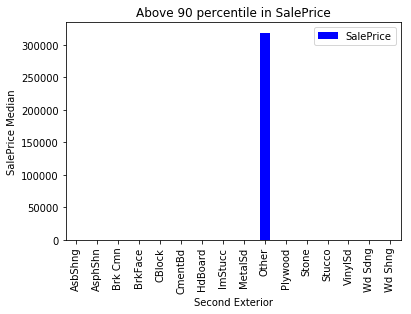

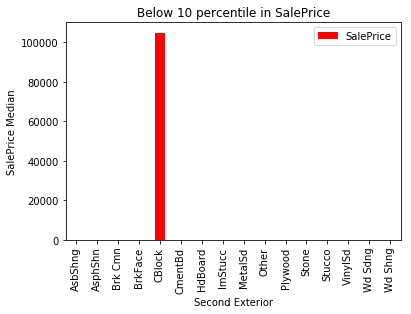

In [80]:
# Now lets have a look at the second ext feature.
exterior2nd_pivot = train.pivot_table(index='Exterior2nd', values='SalePrice', aggfunc = np.median)

exterior2nd_pivot[exterior2nd_pivot>train.SalePrice.quantile(0.90)].plot(kind='bar', color='blue')
plt.xlabel('Second Exterior')
plt.ylabel('SalePrice Median')
plt.title('Above 90 percentile in SalePrice')
plt.show()

exterior2nd_pivot[exterior2nd_pivot<train.SalePrice.quantile(0.1)].plot(kind='bar', color='red')
plt.xlabel('Second Exterior')
plt.ylabel('SalePrice Median')
plt.title('Below 10 percentile in SalePrice')
plt.show()

In [81]:
def encode(x): return 1 if (x == 'Other') else 0
train['enc_exterior2nd_high'] = train.Exterior2nd.apply(encode)
test['enc_exterior2nd_high'] = test.Exterior2nd.apply(encode)

def encode(x): return 1 if (x == 'CBlock') else 0
train['enc_exterior2nd_low'] = train.Exterior2nd.apply(encode)
test['enc_exterior2nd_low'] = test.Exterior2nd.apply(encode)

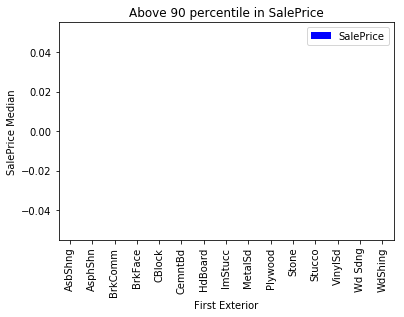

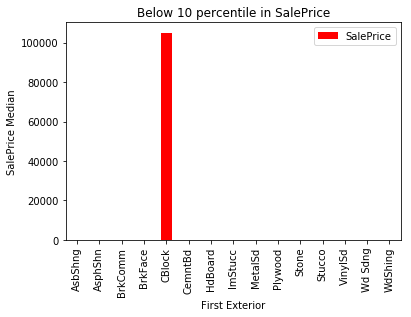

In [82]:
exterior1st_pivot = train.pivot_table(index='Exterior1st', values='SalePrice', aggfunc = np.median)

exterior1st_pivot[exterior1st_pivot>train.SalePrice.quantile(0.90)].plot(kind='bar', color='blue')
plt.xlabel('First Exterior')
plt.ylabel('SalePrice Median')
plt.title('Above 90 percentile in SalePrice')
plt.show()

exterior1st_pivot[exterior2nd_pivot<train.SalePrice.quantile(0.1)].plot(kind='bar', color='red')
plt.xlabel('First Exterior')
plt.ylabel('SalePrice Median')
plt.title('Below 10 percentile in SalePrice')
plt.show()

In [83]:
def encode(x): return 1 if (x == 'CBlock') else 0
train['enc_exterior1st_low'] = train.Exterior1st.apply(encode)
test['enc_exterior1st_low'] = test.Exterior1st.apply(encode)

In [84]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, test_size=.33)

In [85]:
linear = linear_model.LinearRegression()
model = linear.fit(X_train, y_train)
predictions = model.predict(X_test)
print ('RMSE:', mean_squared_error(y_test, predictions))

RMSE: 0.02183019714794812


In [86]:
submission = pd.DataFrame()
submission['Id'] = test.Id
features = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(features)
predictions_for_submission = np.exp(predictions)
submission['SalePrice'] = predictions_for_submission
submission.head()
submission.to_csv('attempt_2.csv', index=False)